In [1]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
boston_1 = load_boston()
boston = pd.DataFrame(boston_1.data, columns=boston_1.feature_names)
boston['MEDV'] = boston_1.target

In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
info={'CRIM' :    'per capita crime rate by town',
        'ZN' :      'proportion of residential land zoned for lots over 25,000 sq.ft',
        'INDUS'    :'proportion of non-retail business acres per town',            
        'CHAS'     :'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
         'NOX'      :'nitric oxides concentration (parts per 10 million)',
         'RM'      : 'average number of rooms per dwelling',
        'AGE'     :'proportion of owner-occupied units built prior to 1940',
        'DIS'      :'weighted distances to five Boston employment centres',
        'RAD'      :'index of accessibility to radial highways',
         'TAX'      :'full-value property-tax rate per $10,000',
         'PTRATIO'  :'pupil-teacher ratio by town',
         'B'        :'1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
         'LSTAT'    :'% lower status of the population',
         'MEDV'     :'Median value of owner-occupied homes in $1000s'}

In [6]:
print(boston_1.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

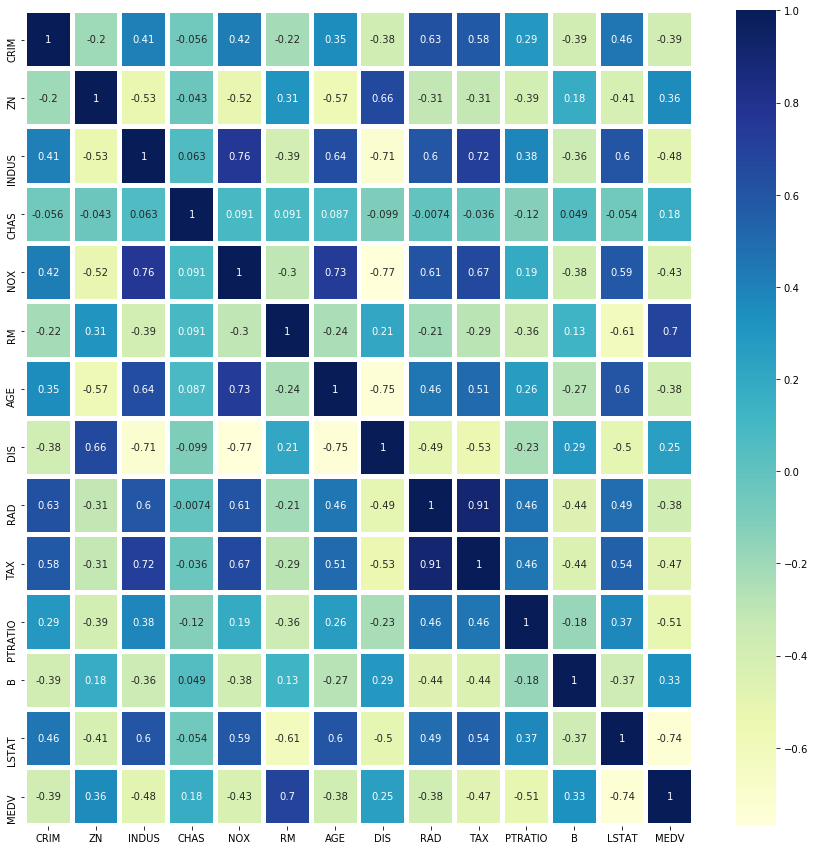

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(boston.corr(),annot=True,linewidths=4,cmap='YlGnBu')

In [8]:
boston['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

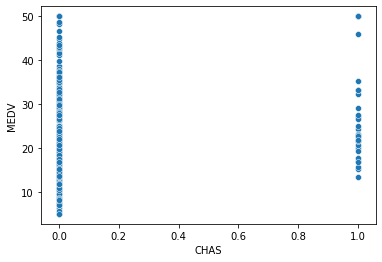

In [9]:
sns.scatterplot(x='CHAS',y='MEDV',data=boston)

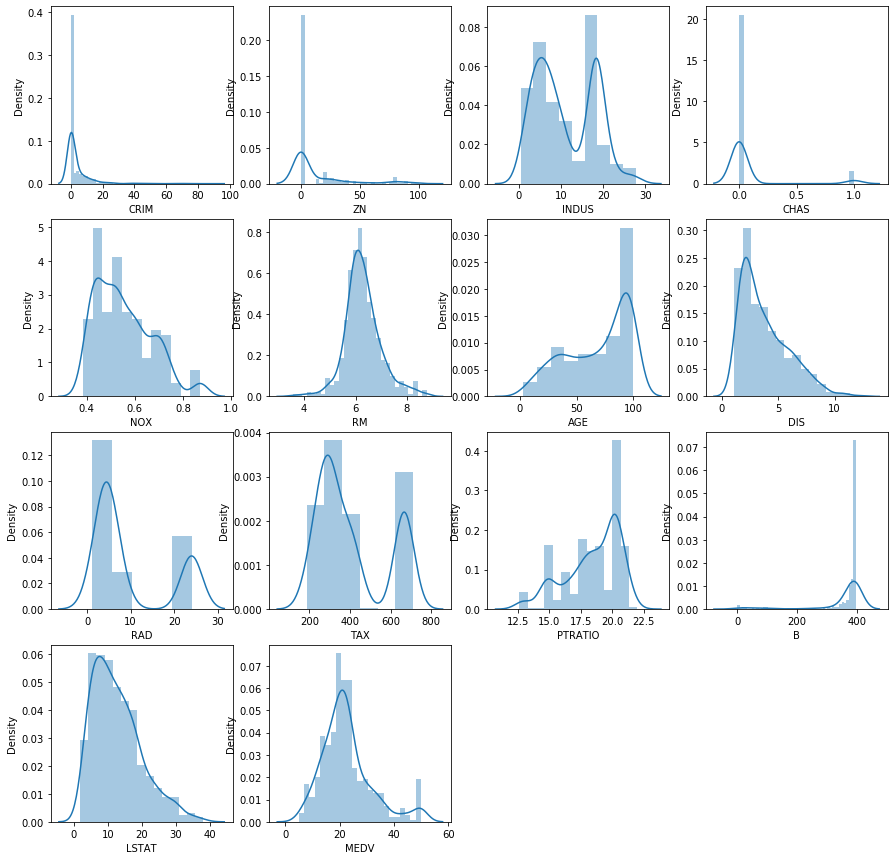

In [10]:
plt.figure(figsize=(15,15))
plotnumber=1

if plotnumber<=15:
    for i in boston:
        plt.subplot(4,4,plotnumber)
        sns.distplot(boston[i])
        plotnumber+=1
    

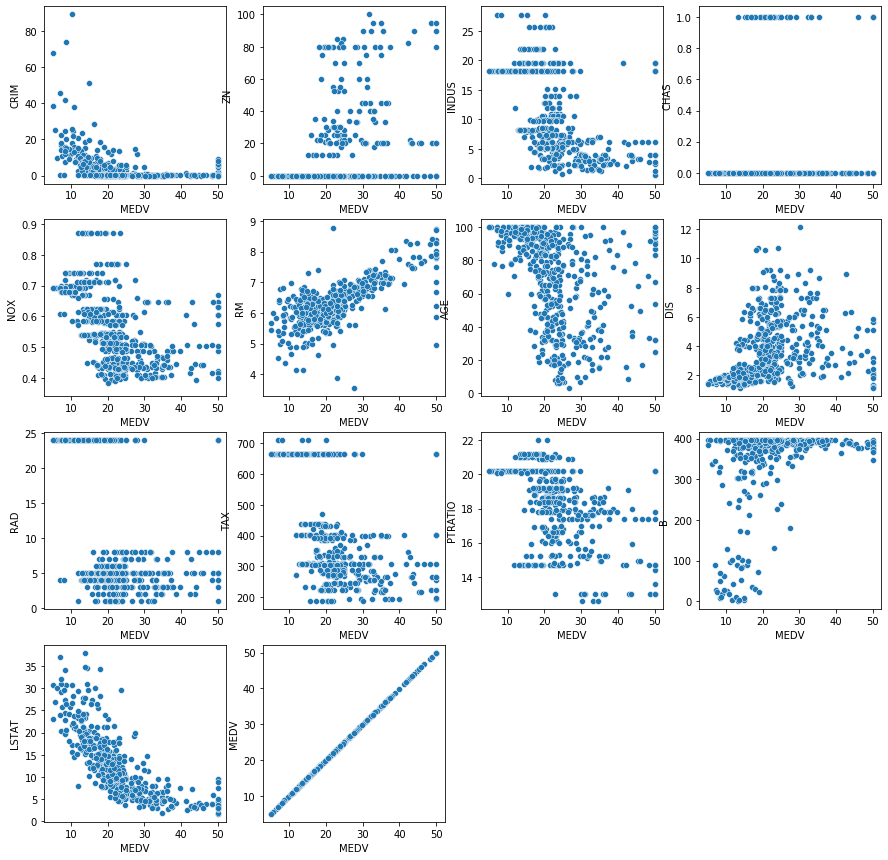

In [11]:
plt.figure(figsize=(15,15))
plotnumber=1

if plotnumber<=13:
    for i in boston:
        plt.subplot(4,4,plotnumber)
        sns.scatterplot(y=i,x='MEDV',data=boston)
        #plt.ylabel(i)
        plotnumber+=1

In [12]:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


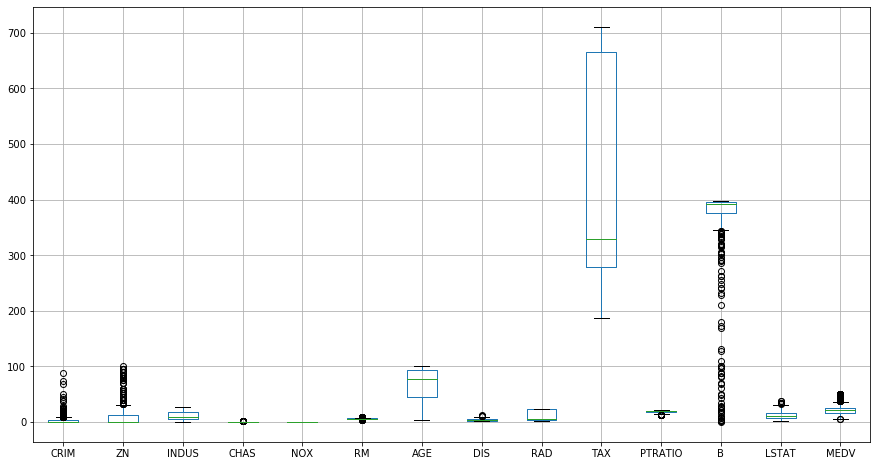

In [13]:
plt.figure(figsize=(15,8))
boston.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA89A7E348>,
      dtype=object)

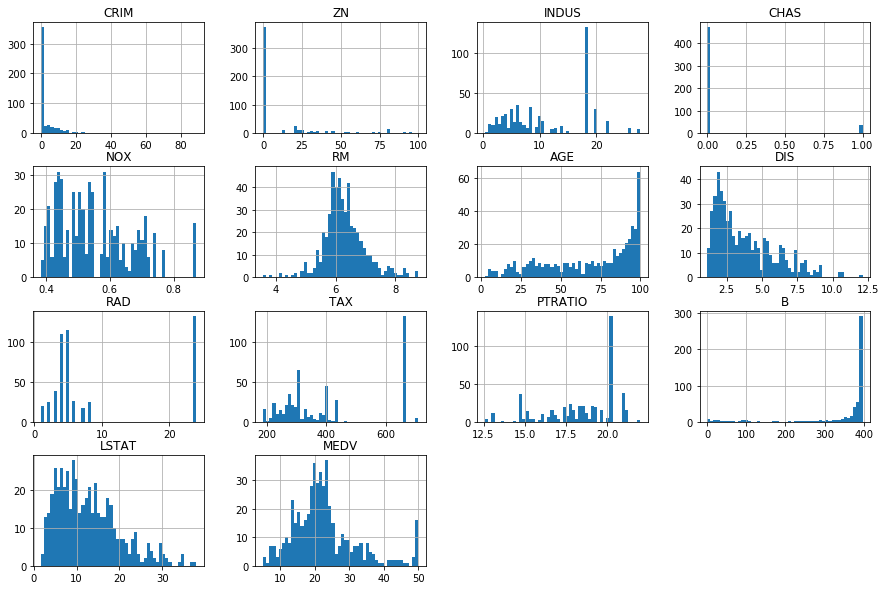

In [14]:
boston.hist(bins=50,figsize=(15,10))

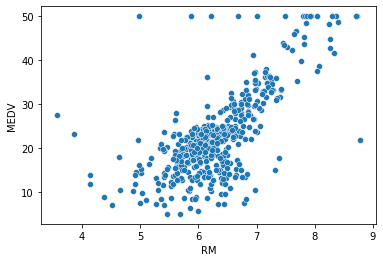

In [15]:
sns.scatterplot(x='RM',y='MEDV',data=boston)

In [16]:
boston[boston['MEDV']==50]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0


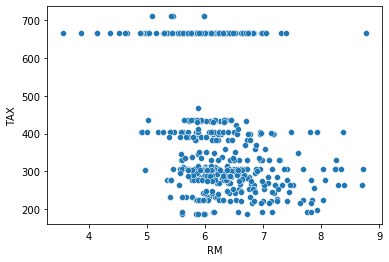

In [17]:
sns.scatterplot(x='RM',y='TAX',data=boston)

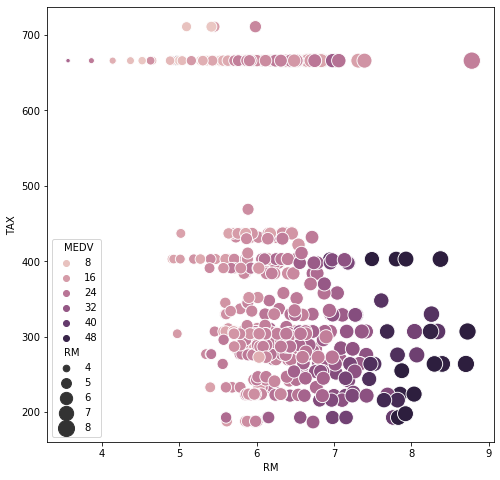

In [18]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='RM',y='TAX',hue='MEDV',data=boston,size='RM',sizes=(20, 300))

In [19]:
boston[boston['TAX']==711.0000]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35,20.1


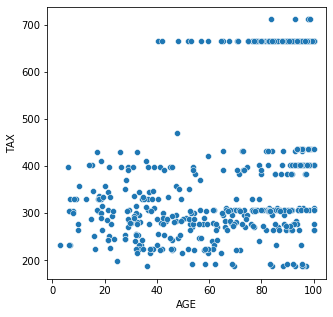

In [20]:
plt.figure(figsize=(5,5))
sns.scatterplot(y='TAX',x='AGE',data=boston)

In [21]:
info

{'CRIM': 'per capita crime rate by town',
 'ZN': 'proportion of residential land zoned for lots over 25,000 sq.ft',
 'INDUS': 'proportion of non-retail business acres per town',
 'CHAS': 'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 'NOX': 'nitric oxides concentration (parts per 10 million)',
 'RM': 'average number of rooms per dwelling',
 'AGE': 'proportion of owner-occupied units built prior to 1940',
 'DIS': 'weighted distances to five Boston employment centres',
 'RAD': 'index of accessibility to radial highways',
 'TAX': 'full-value property-tax rate per $10,000',
 'PTRATIO': 'pupil-teacher ratio by town',
 'B': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
 'LSTAT': '% lower status of the population',
 'MEDV': 'Median value of owner-occupied homes in $1000s'}

In [22]:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


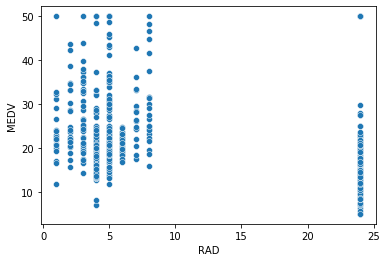

In [23]:
sns.scatterplot(y='MEDV',x='RAD',data=boston)

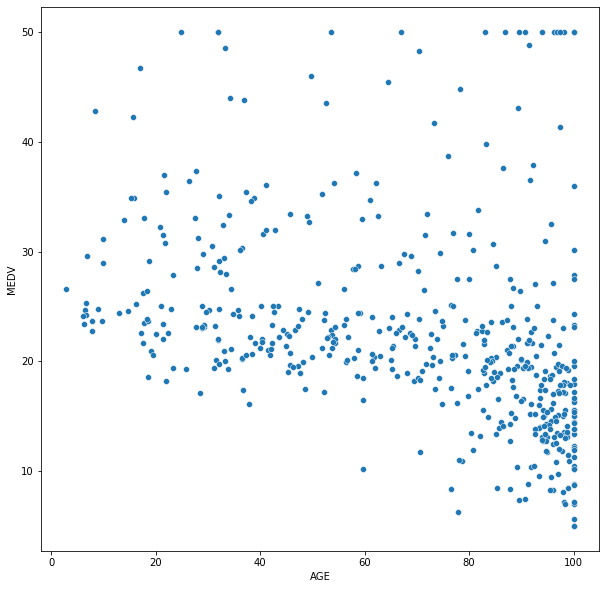

In [24]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='MEDV',x='AGE',data=boston)

In [25]:
import seaborn as sns
>>> from seaborn_qqplot import pplot
>>> iris = sns.load_dataset('iris')
>>> pplot(iris, x="petal_length", y="sepal_length", kind='qq')

ModuleNotFoundError: No module named 'seaborn_qqplot'

In [29]:
import statsmodels.api as sm

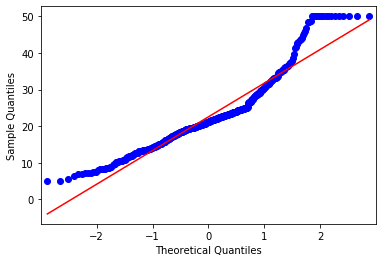

In [37]:
sm.qqplot(boston['MEDV'],line='s')
plt.show()

In [ ]:
sns.